In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
inputFiles = ['../scanResults_axial.pcl', '../scanResults_vector.pcl']
dfs = [pd.read_pickle(i) for i in inputFiles]
recastData = pd.concat(dfs, ignore_index=True)

### Get all model points

In [3]:
models = []
mCols = ['Coupling', 'Mode', '$m_{med}$', '$m_{DM}$', '$g_{DM}$', '$g_{q}$']
for row in recastData[mCols].values:
    m = dict(zip(mCols, row.tolist()))
    if m not in models:
        models.append(m)

print('%i models loaded.' %len(models))

353 models loaded.


### Get models parameters

In [4]:
parameters = {label : list(set([m[label] for m in models])) for label in mCols}
for k,v in parameters.items():
    if len(v) == 1:
        parameters[k] = v[0]
print(parameters)

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in parameters.items() if k not in ['$m_{med}$','$m_{DM}$']])
print(textstr)

{'Coupling': ['Axial', 'Vector'], 'Mode': 'DM+QCDjets', '$m_{med}$': [450.0, 1250.0, 100.0, 2500.0, 200.0, 1000.0, 2250.0, 300.0, 750.0, 400.0, 2000.0, 500.0, 1750.0, 3000.0, 250.0, 1500.0, 2750.0], '$m_{DM}$': [1.0, 900.0, 1400.0, 650.0, 400.0, 150.0, 30.0, 800.0, 40.0, 300.0, 45.0, 1200.0, 50.0, 55.0, 700.0, 60.0, 450.0, 70.0, 200.0, 75.0, 1100.0, 80.0, 600.0, 90.0, 1500.0, 350.0, 100.0, 1000.0, 750.0, 500.0, 120.0, 250.0], '$g_{DM}$': 1.0, '$g_{q}$': 0.25}
Coupling = ['Axial', 'Vector']
Mode = DM+QCDjets
$g_{DM}$ = 1.0
$g_{q}$ = 0.25


### Filter parameters

In [5]:
paramFilter = {
    'Mode' : 'DM+QCDjets',
    '$m_{med}$' : 100.,
    '$m_{DM}$' : 1.,
    '$g_{DM}$' : 1.,
    '$g_{q}$' : .25,
    'Data-takingperiod' : 2018
}

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in paramFilter.items()])
dfModel = recastData.loc[(recastData[list(paramFilter)] == pd.Series(paramFilter)).all(axis=1)]

The efficiency for the $i$-th bin, $\epsilon_{i}$, is given by:

$$ \epsilon_{i} = \frac{n^{i}_{s}}{\sigma_{T}\mathcal{L}},   $$
where $n^{i}_{s}$ is the number of events in the correspondent bin, $\sigma_{T}$ is the total cross-section, and $\mathcal{L}$ is the integrated luminosity.  

### Auxiliar functions for plotting

In [6]:
def getBins(dfModel,rightBin = 2000.):
    
    bins = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and not 'Error' in c)}
    binsError = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and 'ErrorPlus' in c)}    
    binCenter = (np.array(list(bins.values()))+np.diff(list(bins.values())+[rightBin])/2).tolist()    
    binLeft = [bins[c] for c in bins]+[rightBin] 
    
    return bins,binsError,binCenter,binLeft


def getEfficiencies(dfSingle, bins):
    
    xsec = dfSingle['Total xsec (pb)'].iloc[0]
    lumi = dfSingle['Luminosity (1/fb)'].iloc[0]
    eff = {c : dfSingle[c].iloc[0]/(xsec*lumi) for c in bins}
    
    return eff

### Plot Efficiencies

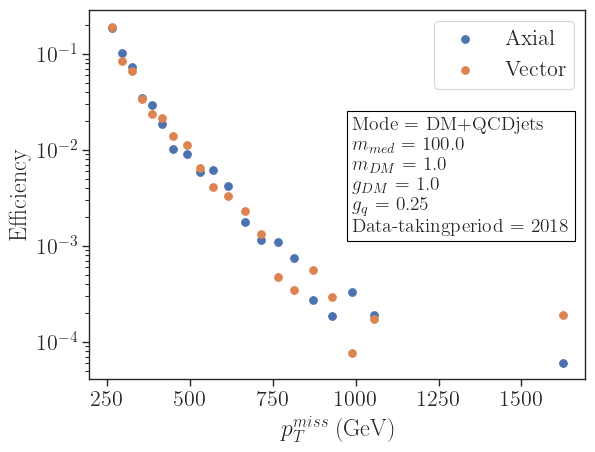

In [7]:
bins, binsError, binCenter, binLeft = getBins(dfModel)

data = {}
for label in dfModel['Coupling']:
    dfSingle = dfModel[dfModel['Coupling'] == label]
    data[label] = getEfficiencies(dfSingle, bins)
    

colors = {label : sns.color_palette('deep')[i] for i, label, in enumerate(data.keys())}

for label in data:
    eff = np.array([data[label][c] for c in bins])
    plt.scatter(x=binCenter, y=eff, s=30, color=colors[label], label=label)

plt.xlabel(r'$p_{T}^{miss}$ (GeV)')

plt.ylabel('Efficiency')
plt.yscale('log')

plt.text(.53, .4, textstr, fontsize=14, bbox=dict(facecolor='none', edgecolor='black'), transform=plt.gca().transAxes)

plt.legend()
plt.show()
 

In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

In [2]:
inputFiles = ['../scanResults_axial.pcl', '../scanResults_vector.pcl']
dfs = [pd.read_pickle(i) for i in inputFiles]
recastData = pd.concat(dfs, ignore_index=True)

In [3]:
models = []
mCols = ['Coupling', 'Mode', '$m_{med}$', '$m_{DM}$']
for row in recastData[mCols].values:
    m = dict(zip(mCols, row.tolist()))
    if m not in models:
        models.append(m)

print('%i models loaded.' %len(models))

353 models loaded.


In [7]:
for im, m in enumerate(models):

    dfModel = recastData.loc[(recastData[list(m)] == pd.Series(m)).all(axis=1)]
    ns = []
    